# Running SQL Queries

### Importing libraries


----

In [1]:
import configparser
import os
import sys
import pprint
# !pip install snowflake-connector-python

import snowflake.connector
import pandas as pd

### Connection and Query Function

----

In [2]:
# Our configuration file
config_ini = 'snowflake.ini'

def get_query(sql_query, config_file):
  """ Connection to snowflake and outputting SQL queries.

  :sql_query: Take in sql query parameter to run in Snowflake
  :config_file: Take in config file with user, password, and account name
  
  Ex. of config file:
  [snowflake]
    user=...
    password=...
    account=...
    .
    .

  """
  config = configparser.ConfigParser()

  config.read(config_file)

  conn = snowflake.connector.connect(
      user=config.get('snowflake','user'), # regular username for logging in
      password=config.get('snowflake','password'), # regular password for logging in
      account=config.get('snowflake','account'))
  
  cs = conn.cursor()

  cs.execute(sql_query)
  row = cs.fetchall()

  print("-"*80)
  print(f"Query:\n {sql_query}\n")
  print(f"Output:\n")

  return pprint.pprint(row)


### Testing First Query

In [3]:
QUERY = "SHOW databases"
config_ini = 'snowflake.ini'

get_query(QUERY, config_ini)

--------------------------------------------------------------------------------
Query:
 SHOW databases

Output:

[(datetime.datetime(2022, 2, 16, 19, 28, 56, 270000, tzinfo=<DstTzInfo 'America/Los_Angeles' PST-1 day, 16:00:00 STD>),
  'SNOWFLAKE',
  'N',
  'N',
  'SNOWFLAKE.ACCOUNT_USAGE',
  '',
  '',
  '',
  '1'),
 (datetime.datetime(2022, 2, 16, 19, 28, 59, 151000, tzinfo=<DstTzInfo 'America/Los_Angeles' PST-1 day, 16:00:00 STD>),
  'SNOWFLAKE_SAMPLE_DATA',
  'N',
  'N',
  'SFC_SAMPLES.SAMPLE_DATA',
  'ACCOUNTADMIN',
  'Provided by Snowflake during account provisioning',
  '',
  '1')]


### Creating Database, Schema, Table

In [4]:
# Creating "TEST_DB" database
q1 = """
        CREATE DATABASE IF NOT EXISTS TEST_DB 
        COMMENT = 'Test Database for Showcase';
     """

get_query(q1, config_ini)

--------------------------------------------------------------------------------
Query:
 
        CREATE DATABASE IF NOT EXISTS TEST_DB 
        COMMENT = 'Test Database for Showcase';
     

Output:

[('Database TEST_DB successfully created.',)]


In [5]:
# Checking if output is correct
q2 = """
        SHOW DATABASES LIKE 'TEST%';
     """

get_query(q2, config_ini)

--------------------------------------------------------------------------------
Query:
 
        SHOW DATABASES LIKE 'TEST%';
     

Output:

[(datetime.datetime(2022, 2, 17, 21, 27, 23, 834000, tzinfo=<DstTzInfo 'America/Los_Angeles' PST-1 day, 16:00:00 STD>),
  'TEST_DB',
  'N',
  'N',
  '',
  'ACCOUNTADMIN',
  'Test Database for Showcase',
  '',
  '1')]


In [6]:
# Creating new "TESTING" schema
q3 = """
        CREATE SCHEMA IF NOT EXISTS TEST_DB.TESTING 
        COMMENT = 'This is the testing schema for the test_db';
     """

get_query(q3, config_ini)

--------------------------------------------------------------------------------
Query:
 
        CREATE SCHEMA IF NOT EXISTS TEST_DB.TESTING 
        COMMENT = 'This is the testing schema for the test_db';
     

Output:

[('Schema TESTING successfully created.',)]


In [7]:
# Creating "GENDER_INEQ" table
q4 = """
        CREATE OR REPLACE TABLE TEST_DB.TESTING.gender_ineq (
        cartodb_id int primary key,
        the_geom varchar,
        the_geom_webmercator varchar,
        country varchar(100),
        datetime datetime,
        yr_data float,
        rw_country_code varchar,
        rw_country_name varchar
        );
     """

get_query(q4, config_ini)

--------------------------------------------------------------------------------
Query:
 
        CREATE OR REPLACE TABLE TEST_DB.TESTING.gender_ineq (
        cartodb_id int primary key,
        the_geom varchar,
        the_geom_webmercator varchar,
        country varchar(100),
        datetime datetime,
        yr_data float,
        rw_country_code varchar,
        rw_country_name varchar
        );
     

Output:

[('Table GENDER_INEQ successfully created.',)]


In [8]:
# Creating "COUNTRY_CODE" table
q5 = """
        CREATE OR REPLACE TABLE TEST_DB.TESTING.country_code (
        name varchar,
        alpha_2 varchar,
        alpha_3 varchar,
        country_code varchar,
        iso_3166_2 varchar,
        region varchar,
        sub_region varchar,
        intermediate_region varchar,
        region_code varchar,
        sub_region_code varchar,
        intermediate_region_code varchar
        );
     """

get_query(q5, config_ini)

--------------------------------------------------------------------------------
Query:
 
        CREATE OR REPLACE TABLE TEST_DB.TESTING.country_code (
        name varchar,
        alpha_2 varchar,
        alpha_3 varchar,
        country_code varchar,
        iso_3166_2 varchar,
        region varchar,
        sub_region varchar,
        intermediate_region varchar,
        region_code varchar,
        sub_region_code varchar,
        intermediate_region_code varchar
        );
     

Output:

[('Table COUNTRY_CODE successfully created.',)]


In [9]:
# Checking if tables were just created correctly
q6 = """
        SHOW TABLES;
     """

output = get_query(q6, config_ini)

--------------------------------------------------------------------------------
Query:
 
        SHOW TABLES;
     

Output:

[(datetime.datetime(2021, 11, 11, 13, 44, 37, 790000, tzinfo=<DstTzInfo 'America/Los_Angeles' PST-1 day, 16:00:00 STD>),
  'CALL_CENTER',
  'SNOWFLAKE_SAMPLE_DATA',
  'TPCDS_SF100TCL',
  'TABLE',
  '',
  'LINEAR( cc_call_center_sk )',
  60,
  18944,
  '',
  '1',
  'OFF',
  'OFF',
  'OFF',
  None,
  None,
  'N'),
 (datetime.datetime(2021, 11, 11, 13, 44, 37, 755000, tzinfo=<DstTzInfo 'America/Los_Angeles' PST-1 day, 16:00:00 STD>),
  'CATALOG_PAGE',
  'SNOWFLAKE_SAMPLE_DATA',
  'TPCDS_SF100TCL',
  'TABLE',
  '',
  'LINEAR( cp_catalog_page_sk )',
  50000,
  2794496,
  '',
  '1',
  'OFF',
  'OFF',
  'OFF',
  None,
  None,
  'N'),
 (datetime.datetime(2021, 11, 11, 13, 44, 37, 803000, tzinfo=<DstTzInfo 'America/Los_Angeles' PST-1 day, 16:00:00 STD>),
  'CATALOG_RETURNS',
  'SNOWFLAKE_SAMPLE_DATA',
  'TPCDS_SF100TCL',
  'TABLE',
  '',
  'LINEAR( cr_returned_date_sk, 

# Loading in CSV's into Snowflake

In [10]:
# Reading csv from data world and github
gender_ineq = pd.read_csv('/content/gender-inequality-index-1.csv')
gender_ineq.to_csv('gender_ineq.csv', index=False)


In [11]:
# Cleaning country code because there were errors in format
country_code = pd.read_csv('https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv')

# Changing column names, replacing dashes with underscore
country_code.columns = [x.replace("-", "_") for x in country_code.columns]

# Need to remove commas
country_comma = country_code[country_code['name'].str.contains(',')]['name'].values

# Removing values that have commas
clean_country = [x.replace(',', '') for x in country_comma]

# Creating a map function to replace old names with cleaned names
mapping = dict(zip(country_comma, clean_country))

# Replacing old values
country_code['name'].replace(mapping, inplace = True)

country_code.to_csv('country_code.csv', index=False)

### Staging and inserting gender inequality CSV into table

In [12]:
# Visualizing gender inequality
pd.read_csv('gender_ineq.csv')

,cartodb_id,the_geom,the_geom_webmercator,country,datetime,yr_data,rw_country_code,rw_country_name
0,1088,NaN,NaN,Venezuela,2013-01-01T00:00:00Z,0.466,VEN,Venezuela
1,1,NaN,NaN,Honduras,1995-01-01T00:00:00Z,NaN,HND,Honduras
2,2,NaN,NaN,Georgia,1995-01-01T00:00:00Z,0.426,GEO,Georgia
3,3,NaN,NaN,Libya,1995-01-01T00:00:00Z,NaN,LBY,Libya
4,4,NaN,NaN,Singapore,1995-01-01T00:00:00Z,0.252,SGP,Singapore
...,...,...,...,...,...,...,...,...
1435,1436,NaN,NaN,Serbia,2015-01-01T00:00:00Z,0.185,SRB,Republic of Serbia
1436,1437,NaN,NaN,South Africa,2015-01-01T00:00:00Z,0.394,ZAF,South Africa
1437,1438,NaN,NaN,Samoa,2015-01-01T00:00:00Z,0.439,WSM,Samoa
1438,1439,NaN,NaN,Togo,2015-01-01T00:00:00Z,0.556,TGO,Togo


In [13]:
# Staging and reading in gender inequality table into Snowflake

q7 = """
        PUT file:////content/gender_ineq.csv @~/staged;
     """

get_query(q7, config_ini)

q8 = """
        COPY INTO TEST_DB.TESTING.gender_ineq FROM '@~/staged/gender_ineq.csv.gz' 
        FILE_FORMAT = (TYPE = CSV, COMPRESSION = GZIP)
        ON_ERROR = continue;
     """

get_query(q8, config_ini)

# Visualizing head of data

q9 = """
        SELECT * FROM TEST_DB.TESTING.gender_ineq
        LIMIT 3;
     """

get_query(q9, config_ini)

--------------------------------------------------------------------------------
Query:
 
        PUT file:////content/gender_ineq.csv @~/staged;
     

Output:

[('gender_ineq.csv',
  'gender_ineq.csv.gz',
  79805,
  0,
  'NONE',
  'GZIP',
  'SKIPPED',
  '')]
--------------------------------------------------------------------------------
Query:
 
        COPY INTO TEST_DB.TESTING.gender_ineq FROM '@~/staged/gender_ineq.csv.gz' 
        FILE_FORMAT = (TYPE = CSV, COMPRESSION = GZIP)
        ON_ERROR = continue;
     

Output:

[('staged/gender_ineq.csv.gz',
  'PARTIALLY_LOADED',
  1441,
  1440,
  1441,
  1,
  "Numeric value 'cartodb_id' is not recognized",
  1,
  1,
  '"GENDER_INEQ"["CARTODB_ID":1]')]
--------------------------------------------------------------------------------
Query:
 
        SELECT * FROM TEST_DB.TESTING.gender_ineq
        LIMIT 3;
     

Output:

[(1088,
  None,
  None,
  'Venezuela',
  datetime.datetime(2013, 1, 1, 0, 0),
  0.466,
  'VEN',
  'Venezuela'),
 (1

### Staging and inserting country code CSV into table

In [14]:
# Visualizing country code
pd.read_csv('country_code.csv')

,name,alpha_2,alpha_3,country_code,iso_3166_2,region,sub_region,intermediate_region,region_code,sub_region_code,intermediate_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,NaN,9.0,61.0,NaN
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,NaN,2.0,15.0,NaN
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,NaN,142.0,145.0,NaN
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


In [15]:
# Staging and reading in country code table into Snowflake

q10 = """
        PUT file:////content/country_code.csv @~/staged;
     """

get_query(q10, config_ini)

q11 = """
        COPY INTO TEST_DB.TESTING.country_code (name, alpha_2, alpha_3, country_code, 
        iso_3166_2, region, sub_region, intermediate_region, region_code, sub_region_code,
        intermediate_region_code) FROM 
        (SELECT t.$2,
                t.$3,
                t.$4,
                t.$5,
                t.$6,
                t.$7,
                t.$8,
                t.$9,
                t.$10,
                t.$11,
                t.$12 
                FROM @~/staged/country_code.csv.gz as t) 
        FILE_FORMAT = (TYPE = CSV, COMPRESSION = GZIP, skip_header = 1)
        ON_ERROR = continue;
     """

get_query(q11, config_ini)

# Visualizing head of data

q12 = """
        SELECT * FROM TEST_DB.TESTING.country_code
        LIMIT 3;
     """

get_query(q12, config_ini)

--------------------------------------------------------------------------------
Query:
 
        PUT file:////content/country_code.csv @~/staged;
     

Output:

[('country_code.csv',
  'country_code.csv.gz',
  20890,
  0,
  'NONE',
  'GZIP',
  'SKIPPED',
  '')]
--------------------------------------------------------------------------------
Query:
 
        COPY INTO TEST_DB.TESTING.country_code (name, alpha_2, alpha_3, country_code, 
        iso_3166_2, region, sub_region, intermediate_region, region_code, sub_region_code,
        intermediate_region_code) FROM 
        (SELECT t.$2,
                t.$3,
                t.$4,
                t.$5,
                t.$6,
                t.$7,
                t.$8,
                t.$9,
                t.$10,
                t.$11,
                t.$12 
                FROM @~/staged/country_code.csv.gz as t) 
        FILE_FORMAT = (TYPE = CSV, COMPRESSION = GZIP, skip_header = 1)
        ON_ERROR = continue;
     

Output:

[('stage

# Exploratory Data Analysis

(Extra)

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime


In [17]:
# My matplotlib personalized style
plt.style.use('ggplot')

plt.rcParams.update({
    "figure.facecolor":  (22/255, 22/255, 22/255, 0.85),
    "figure.figsize": (15, 10),
    "axes.facecolor":    (22/255, 22/255, 22/255, 0.2),  
    "xtick.color": 'lightgrey',
    "ytick.color": 'lightgrey',
    "grid.alpha": 0.1,
    "grid.color": 'salmon',
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "axes.titlecolor": 'lightgrey',
    "axes.labelcolor": 'lightgrey',
    "axes.labelsize": 15,
    "text.color": 'white',
    "axes.titlecolor": "lightgrey",
    "legend.fontsize": 13
})


In [18]:
data = pd.read_csv('gender_ineq.csv')
data.head()

,cartodb_id,the_geom,the_geom_webmercator,country,datetime,yr_data,rw_country_code,rw_country_name
0,1088,NaN,NaN,Venezuela,2013-01-01T00:00:00Z,0.466,VEN,Venezuela
1,1,NaN,NaN,Honduras,1995-01-01T00:00:00Z,NaN,HND,Honduras
2,2,NaN,NaN,Georgia,1995-01-01T00:00:00Z,0.426,GEO,Georgia
3,3,NaN,NaN,Libya,1995-01-01T00:00:00Z,NaN,LBY,Libya
4,4,NaN,NaN,Singapore,1995-01-01T00:00:00Z,0.252,SGP,Singapore


In [19]:
data['datetime'] = pd.to_datetime(data['datetime'])
data.head()

,cartodb_id,the_geom,the_geom_webmercator,country,datetime,yr_data,rw_country_code,rw_country_name
0,1088,NaN,NaN,Venezuela,2013-01-01 00:00:00+00:00,0.466,VEN,Venezuela
1,1,NaN,NaN,Honduras,1995-01-01 00:00:00+00:00,NaN,HND,Honduras
2,2,NaN,NaN,Georgia,1995-01-01 00:00:00+00:00,0.426,GEO,Georgia
3,3,NaN,NaN,Libya,1995-01-01 00:00:00+00:00,NaN,LBY,Libya
4,4,NaN,NaN,Singapore,1995-01-01 00:00:00+00:00,0.252,SGP,Singapore


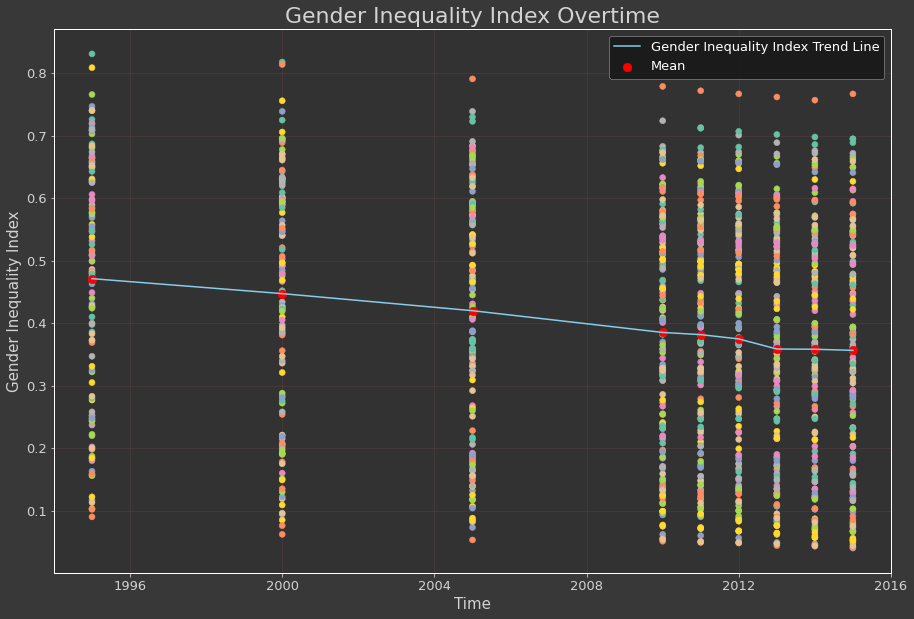

In [20]:
fig, axs = plt.subplots()

rgb_values = sns.color_palette("Set2", len(data['country'].unique()))
color_labels = data['country'].unique()
color_map = dict(zip(color_labels, rgb_values))

axs.scatter(data['datetime'], data['yr_data'], c = data['country'].map(color_map))
axs.scatter(x = data.groupby(['datetime']).mean().index, y = data.groupby(['datetime']).mean()['yr_data'], 
            s = 75, c = 'red', label = 'Mean')
axs.plot(data.groupby(['datetime']).mean().index, data.groupby(['datetime']).mean()['yr_data'], label = 'Gender Inequality Index Trend Line', 
         c = 'skyblue')
axs.set_xlabel('Time')
axs.set_ylabel('Gender Inequality Index')
axs.set_title('Gender Inequality Index Overtime', size = 22)
axs.legend()
fig.show()